*** The following data set called “anderson.dat” consists
of remission survival times on 42 leukemia patients,
half of whom get a certain new treatment therapy and
the other half of whom get a standard treatment
therapy. The exposure variable of interest is treatment
status (Rx = 0 if new treatment, Rx = 1 if standard
treatment). Two other variables for control as potential
confounders are log white blood cell count (i.e.,
logwbc) and sex. Failure status is defined by the relapse
variable (0 if censored, 1 if failure). ***

In [1]:
library(ggplot2)
library(survival)
library(KMsurv)

In [2]:
dataset = read.delim("anderson.dat", sep = " ", header = FALSE)
colnames(dataset) = c("Survt", "Relapse", "Sex", "logWBC", "Rx")
head(dataset)

Survt,Relapse,Sex,logWBC,Rx
35,0,1,1.45,0
34,0,1,1.47,0
32,0,1,2.20,0
32,0,1,2.53,0
25,0,1,1.78,0
23,1,1,2.57,0


In [4]:
br = c(0, 2.30, 3.00, 1000)
lab = c("Low", "Medium", "High")
logwbc.cat = cut(dataset$logWBC, breaks = br, right = T, include.lowest = T, labels = lab)
dataset = cbind(dataset,logwbc.cat)
head(dataset)

Survt,Relapse,Sex,logWBC,Rx,logwbc.cat,logwbc.cat
35,0,1,1.45,0,Low,Low
34,0,1,1.47,0,Low,Low
32,0,1,2.20,0,Low,Low
32,0,1,2.53,0,Medium,Medium
25,0,1,1.78,0,Low,Low
23,1,1,2.57,0,Medium,Medium


Loading required package: ggpubr
Loading required package: magrittr


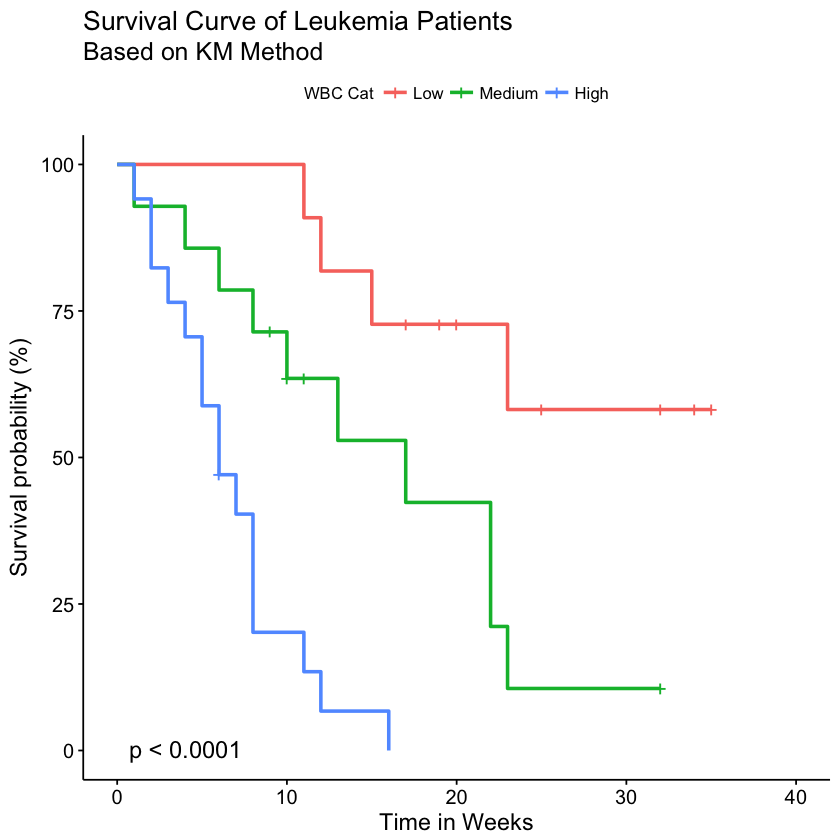

In [8]:
library( survival )
library(survminer)
kmEst.WBC <- survfit( Surv(Survt, Relapse) ~ logwbc.cat, data= dataset, conf.type = "log-log" )
ggsurvplot(kmEst.WBC, data = dataset, pval = TRUE, fun = "pct", size = 1, 
           legend.title = "WBC Cat", legend.labs = c("Low", "Medium", "High"), 
           xlab = "Time in Weeks") + labs(title = "Survival Curve of Leukemia Patients", subtitle = "Based on KM Method")

In [9]:
summary(kmEst.WBC)


Call: survfit(formula = Surv(Survt, Relapse) ~ logwbc.cat, data = dataset, 
    conf.type = "log-log")

                logwbc.cat=Low 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11     11       1    0.909  0.0867        0.508        0.987
   12     10       1    0.818  0.1163        0.447        0.951
   15      9       1    0.727  0.1343        0.371        0.903
   23      5       1    0.582  0.1687        0.213        0.827

                logwbc.cat=Medium 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     14       1    0.929  0.0688       0.5908        0.990
    4     13       1    0.857  0.0935       0.5394        0.962
    6     12       1    0.786  0.1097       0.4725        0.925
    8     11       1    0.714  0.1207       0.4063        0.882
   10      9       1    0.635  0.1308       0.3312        0.830
   13      6       1    0.529  0.1457       0.2263        0.761
   17      5       1    0.423  0.1501       0.1452        0.

***1. For the vets.dat data set described in the presentation: <br>
a. Obtain KM plots for the two categories of the variable
cell type 1 (1 = large, 0 = other). Comment on
how the two curves compare with each other. Carry
out the log–rank, and draw conclusions from the
test(s).<br>
b. Obtain KMplots for the four categories of cell type -
large, adeno, small, and squamous. Note that you
will need to recode the data to define a single variable
which numerically distinguishes the four categories
(e.g., 1 = large, 2 = adeno, etc.). As in part a,
compare the four KM curves. Also, carry out the
log–rank for the equality of the four curves and
draw conclusions. <br>***

In [58]:

library(survival)
vets.data = read.table("ftp://stat.ethz.ch/U/sfs/seminar/vets.dat", header = FALSE)

In [90]:
colnames(vets.data) = c("Trt", "Cell_type", "Adeno_or_Other", "Small_or_Other", "Squamous_or_Other", "Surv_Time",
                      "Perf_status", "Disease_Duration", "Age", "Prior_Therapy", "Status")

head(vets.data)

Trt,Cell_type,Adeno_or_Other,Small_or_Other,Squamous_or_Other,Surv_Time,Perf_status,Disease_Duration,Age,Prior_Therapy,Status
1,0,0,0,1,72,60,7,69,0,1
1,0,0,0,1,411,70,5,64,10,1
1,0,0,0,1,228,60,3,38,0,1
1,0,0,0,1,126,60,9,63,10,1
1,0,0,0,1,118,70,11,65,10,1
1,0,0,0,1,10,20,5,49,0,1


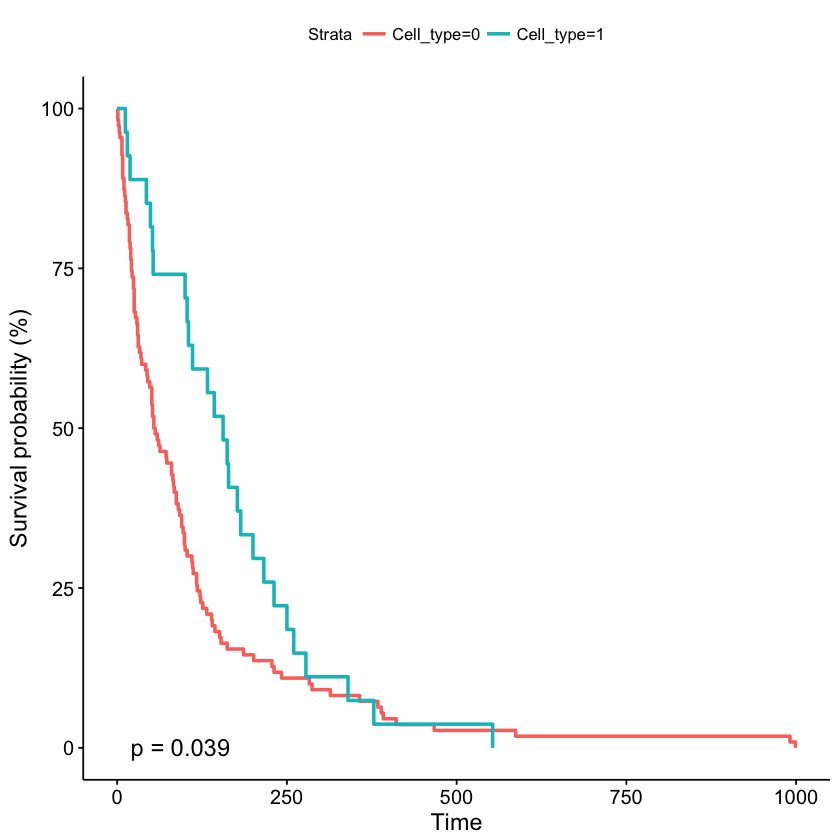

In [89]:
library(survminer)
kmEst.Vets <- survfit( Surv(Surv_Time) ~ Cell_type, data= vets.data, conf.type = "log" )
ggsurvplot(kmEst.Vets, data = vets.data, pval = TRUE, fun = "pct", size = 1)

In [82]:
library(KMsurv)
survdiff(Surv(Surv_Time) ~ Cell_type, data= vets.data)


Call:
survdiff(formula = Surv(Surv_Time) ~ Cell_type, data = vets.data)

              N Observed Expected (O-E)^2/E (O-E)^2/V
Cell_type=0 110      110     99.5      1.12      4.26
Cell_type=1  27       27     37.5      2.96      4.26

 Chisq= 4.3  on 1 degrees of freedom, p= 0.039 

In [91]:
library(survival)
vets.data = veteran
head(vets.data)

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,10
1,squamous,118,1,70,11,65,10
1,squamous,10,1,20,5,49,0


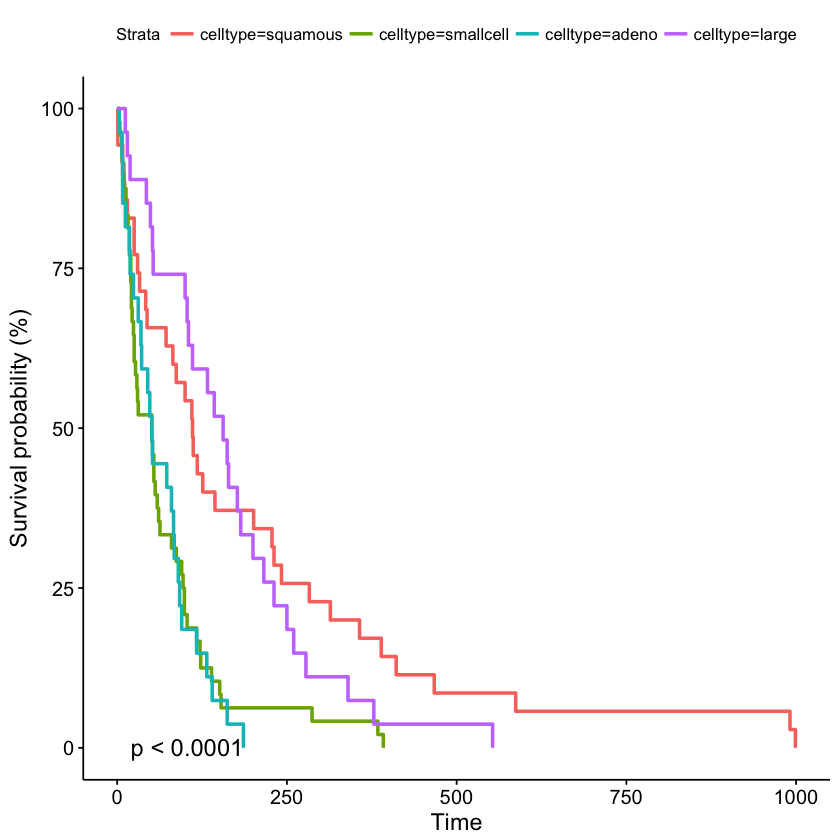

In [101]:
library(survminer)
kmEst.Vets <- survfit( Surv(time) ~ celltype, data= vets.data, conf.type = "log" )
ggsurvplot(kmEst.Vets, data = vets.data, pval = TRUE, fun = "pct", size = 1)

In [103]:
library(KMsurv)
survdiff(Surv(time) ~ celltype, data= vets.data)



Call:
survdiff(formula = Surv(time) ~ celltype, data = vets.data)

                    N Observed Expected (O-E)^2/E (O-E)^2/V
celltype=squamous  35       35     51.0      5.03      9.05
celltype=smallcell 48       48     31.9      8.15     11.24
celltype=adeno     27       27     16.6      6.58      7.96
celltype=large     27       27     37.5      2.96      4.26

 Chisq= 25.9  on 3 degrees of freedom, p= 9.8e-06 